In [1]:
import tensorflow as tf
import sys
sys.path.append('../')
from data_processing.stl10 import get_stl10

In [2]:
visible_devices = tf.config.get_visible_devices()
for devices in visible_devices:
  print(devices)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


Epoch 1/2
2/2 [==============================] - 47s 22s/step - loss: 2.5782
Epoch 2/2
2/2 [==============================] - 33s 16s/step - loss: 2.3584


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


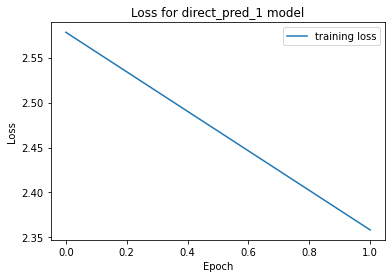

In [4]:
import numpy as np
from models import resnet18 
from models import model 

batch_size = 128
epochs = 2
num_classes = 10 
saved_model_path = 'saved_model'

ds, num_samples = get_stl10('train', batch_size=batch_size)
dp = model.DirectPred(num_classes)
dp.compile()
dp.train(ds.take(2), epochs=epochs, save_path=saved_model_path)

In [10]:
import importlib
importlib.reload(resnet18)
importlib.reload(model)

dp.load_model(saved_model_path)
dp.compile()
dp.train(ds, training_samples=320, epochs=epochs, batch_size=batch_size, save_path='saved_model')

Model: "res_net18_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          multiple                  9472      
_________________________________________________________________
batch_normalization_120 (Bat multiple                  256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 multiple                  0         
_________________________________________________________________
sequential_42 (Sequential)   (None, 56, 56, 64)        148736    
_________________________________________________________________
sequential_43 (Sequential)   (None, 28, 28, 128)       527488    
_________________________________________________________________
sequential_45 (Sequential)   (None, 14, 14, 256)       2103552   
_________________________________________________________________
sequential_47 (Sequential)   (None, 7, 7, 512)         

Epoch 1/4
2/2 [==============================] - 35s 15s/step - loss: 1.9477
Epoch 2/4
2/2 [==============================] - 44s 18s/step - loss: 1.9297
Epoch 3/4
2/2 [==============================] - 36s 18s/step - loss: 1.9046
Epoch 4/4
2/2 [==============================] - 38s 18s/step - loss: 1.9263


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


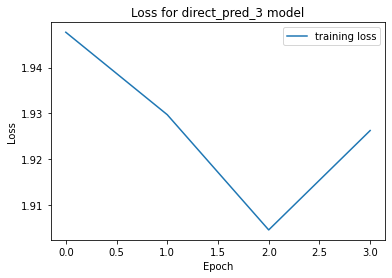

In [7]:
dp = model.DirectPred(num_classes)
dp.load_model(saved_model_path)
dp.compile()
dp.train(ds, training_samples=320, epochs=4, batch_size=batch_size, save_path='saved_model')